In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
import cryojax.simulator as cs
import matplotlib.pyplot as plt

from cryojax.utils.fft import ifftn

In [46]:
density = cs.Ellipsoid(100,200,300)
scattering = cs.ShapeProjection(shape=(320, 320), pad_scale=1.2)


/mnt/home/gwoollard/software/mambaforge/envs/cryojax/lib/python3.10/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


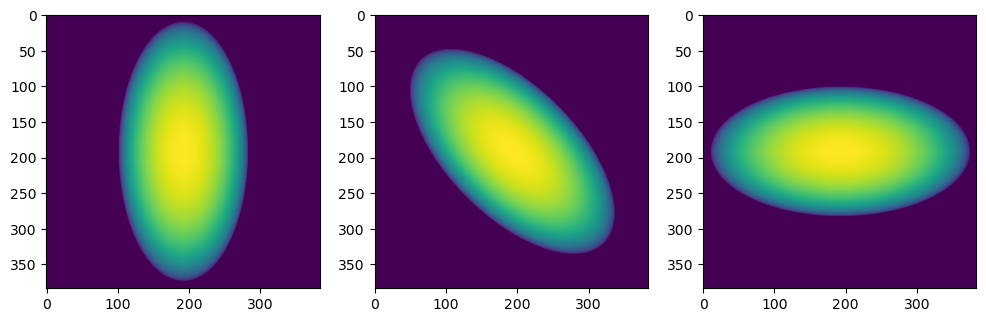

In [71]:

fig, axes = plt.subplots(1,3, figsize=(12,4))
for idx, deg_angle in enumerate([0,45,90]):
    pose = cs.EulerPose(view_phi=deg_angle, view_theta=0.0, view_psi=0.0)
    proj_f = scattering.scatter(density, pose, resolution=1.1)
    proj = ifftn(proj_f).astype(jnp.float32)
    axes[idx].imshow(proj)

In [53]:
specimen = cs.Specimen(density=density, pose=pose, resolution=1.1)

In [67]:
key = jax.random.PRNGKey(seed=0)
optics = cs.CTFOptics(defocus_u=10000.0, defocus_v=9800.0, defocus_angle=10.0)
detector = cs.GaussianDetector(key=key, pixel_size=1.1, variance=cs.Constant(1.0))
instrument = cs.Instrument(optics=optics, detector=detector)

In [68]:
model = cs.GaussianImage(scattering=scattering, specimen=specimen, instrument=instrument)
image = model()
image = model.render()


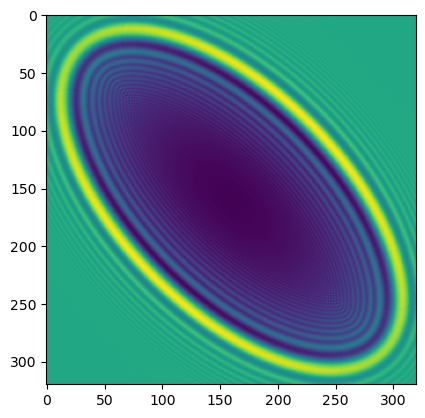

In [69]:
plt.imshow(image)

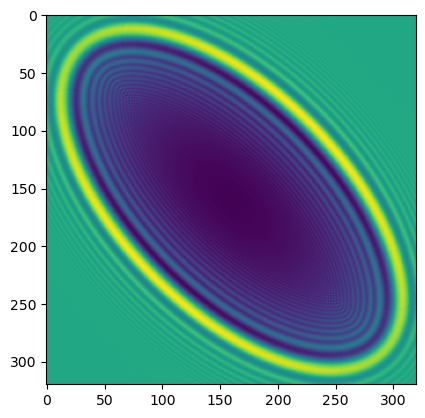

In [70]:
plt.imshow(image)

In [44]:
f = jax.jit(lambda model: model.sample())

image = f(model)

In [ ]:
image = f(model2)

# non-square map

In [11]:
template = '/mnt/home/gwoollard/repos/cryojax/data/alphafold_Q9NUA2_molmap3.mrc'
density = cs.VoxelGrid.from_file(template)
scattering = cs.FourierSliceScattering(shape=(203, 203))



In [79]:
pose = cs.EulerPose(view_phi=30.0, view_theta=30.0, view_psi=0.0)
specimen = cs.Specimen(density=density, pose=pose, resolution=1.1)

([], [])

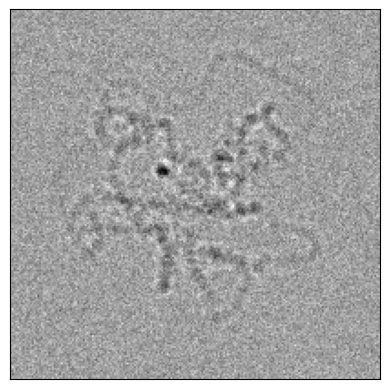

In [80]:
key = jax.random.PRNGKey(seed=0)
df = 2000
optics = cs.CTFOptics(defocus_u=df, defocus_v=df, defocus_angle=0)
detector = cs.GaussianDetector(key=key, pixel_size=1.1, variance=cs.Constant(5e-3))
instrument = cs.Instrument(optics=optics, detector=detector)

model = cs.GaussianImage(scattering=scattering, specimen=specimen, instrument=instrument)
image = model.sample()

ax = plt.imshow(image, cmap='gray')
# plt.colorbar()
plt.xticks([])
plt.yticks([])

# readme

In [3]:
template = '/mnt/home/mobrien/cryojax-hackathon/6b0i_bfm1_ps1_1.mrc'
scattering = cs.FourierSliceScattering(shape=(320, 320))
density = cs.VoxelGrid.from_file(template)

2023-12-15 12:27:46.529545: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.103). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [4]:
pose = cs.EulerPose(view_phi=0.0, view_theta=0.0, view_psi=0.0)
specimen = cs.Specimen(density=density, pose=pose, resolution=1.1)

In [5]:
key = jax.random.PRNGKey(seed=0)
optics = cs.CTFOptics(defocus_u=10000.0, defocus_v=9800.0, defocus_angle=10.0)
detector = cs.GaussianDetector(key=key, pixel_size=1.1, variance=cs.Constant(1.0))
instrument = cs.Instrument(optics=optics, detector=detector)

In [6]:
model = cs.GaussianImage(scattering=scattering, specimen=specimen, instrument=instrument)
image = model()
image = model.render()


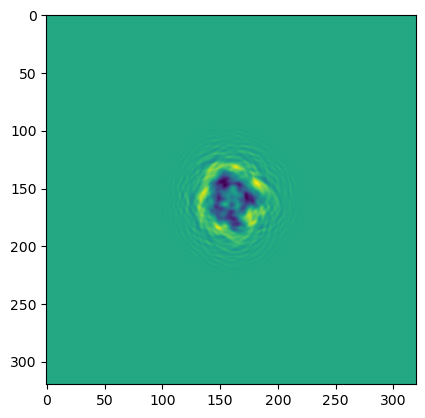

In [8]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [12]:
filters = [cs.LowpassFilter(scattering.padded_shape, cutoff=1.0),  # Cutoff modes above Nyquist frequency
          ]
masks = [cs.CircularMask(scattering.shape, radius=1.0)]           # Cutoff pixels above radius equal to (half) image size
model = cs.GaussianImage(scattering=scattering, specimen=specimen, instrument=instrument, filters=filters, masks=masks)
image = model()

In [13]:
model = cs.GaussianImage(scattering=scattering, specimen=specimen, instrument=instrument)
log_likelihood = model(observed=observed)

NameError: name 'observed' is not defined